In [1]:
import tensorflow as tf
import numpy as np

from keras.datasets import cifar10
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, plot_model




Using TensorFlow backend.


In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size * 3

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) 
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [3]:
# hyper-parameters
batch_size = 256
n_units = 256
epochs = 1

In [4]:
# model is a 3-layer MLP
model = Sequential(name='3-layer-MLP')
model.add(Dense(n_units, input_dim=input_size, activation='relu', name='input_layer'))
model.add(Dense(n_units, activation='relu', name='hidden_layer'))
model.add(Dense(num_labels, activation='softmax', name='output_layer'))
model.summary()

Model: "3-layer-MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 256)               786688    
_________________________________________________________________
hidden_layer (Dense)         (None, 256)               65792     
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))


  1/196 [..............................] - ETA: 0s - loss: 2.4188 - accuracy: 0.1133

  5/196 [..............................] - ETA: 2s - loss: 2.3647 - accuracy: 0.1031

  9/196 [>.............................] - ETA: 2s - loss: 2.3334 - accuracy: 0.1181

 13/196 [>.............................] - ETA: 2s - loss: 2.3182 - accuracy: 0.1247

 17/196 [=>............................] - ETA: 2s - loss: 2.3059 - accuracy: 0.1337

 21/196 [==>...........................] - ETA: 2s - loss: 2.2951 - accuracy: 0.1412

 25/196 [==>...........................] - ETA: 2s - loss: 2.2847 - accuracy: 0.1503

 29/196 [===>..........................] - ETA: 2s - loss: 2.2768 - accuracy: 0.1537

 33/196 [====>.........................] - ETA: 2s - loss: 2.2674 - accuracy: 0.1615

 37/196 [====>.........................] - ETA: 2s - loss: 2.2600 - accuracy: 0.1654

 41/196 [=====>........................] - ETA: 2s - loss: 2.2532 - accuracy: 0.1711

 45/196 [=====>........................] - ETA: 2s - loss: 2.2456 - accuracy: 0.1753

 49/196 [======>.......................] - ETA: 2s - loss: 2.2391 - accuracy: 0.1796

 53/196 [=======>......................] - ETA: 1s - loss: 2.2325 - accuracy: 0.1851

 57/196 [=======>......................] - ETA: 1s - loss: 2.2257 - accuracy: 0.1900

 61/196 [========>.....................] - ETA: 1s - loss: 2.2203 - accuracy: 0.1927

 65/196 [========>.....................] - ETA: 1s - loss: 2.2152 - accuracy: 0.1954

 69/196 [=========>....................] - ETA: 1s - loss: 2.2093 - accuracy: 0.2003

 73/196 [==========>...................] - ETA: 1s - loss: 2.2032 - accuracy: 0.2043

 77/196 [==========>...................] - ETA: 1s - loss: 2.1987 - accuracy: 0.2074

 81/196 [===========>..................] - ETA: 1s - loss: 2.1934 - accuracy: 0.2100

 85/196 [============>.................] - ETA: 1s - loss: 2.1889 - accuracy: 0.2122

 89/196 [============>.................] - ETA: 1s - loss: 2.1843 - accuracy: 0.2144

 93/196 [=============>................] - ETA: 1s - loss: 2.1798 - accuracy: 0.2162

 97/196 [=============>................] - ETA: 1s - loss: 2.1754 - accuracy: 0.2188

101/196 [==============>...............] - ETA: 1s - loss: 2.1707 - accuracy: 0.2214

105/196 [===============>..............] - ETA: 1s - loss: 2.1662 - accuracy: 0.2240

108/196 [===============>..............] - ETA: 1s - loss: 2.1628 - accuracy: 0.2255

112/196 [================>.............] - ETA: 1s - loss: 2.1575 - accuracy: 0.2285

116/196 [================>.............] - ETA: 1s - loss: 2.1541 - accuracy: 0.2304

120/196 [=================>............] - ETA: 1s - loss: 2.1501 - accuracy: 0.2330

124/196 [=================>............] - ETA: 1s - loss: 2.1464 - accuracy: 0.2349

128/196 [==================>...........] - ETA: 0s - loss: 2.1424 - accuracy: 0.2366

132/196 [===================>..........] - ETA: 0s - loss: 2.1388 - accuracy: 0.2382

136/196 [===================>..........] - ETA: 0s - loss: 2.1356 - accuracy: 0.2387

140/196 [====================>.........] - ETA: 0s - loss: 2.1314 - accuracy: 0.2407

144/196 [=====================>........] - ETA: 0s - loss: 2.1279 - accuracy: 0.2426

148/196 [=====================>........] - ETA: 0s - loss: 2.1243 - accuracy: 0.2441

152/196 [======================>.......] - ETA: 0s - loss: 2.1217 - accuracy: 0.2453

156/196 [======================>.......] - ETA: 0s - loss: 2.1187 - accuracy: 0.2466

160/196 [=======================>......] - ETA: 0s - loss: 2.1155 - accuracy: 0.2478

164/196 [========================>.....] - ETA: 0s - loss: 2.1127 - accuracy: 0.2487

168/196 [========================>.....] - ETA: 0s - loss: 2.1101 - accuracy: 0.2498

172/196 [=========================>....] - ETA: 0s - loss: 2.1074 - accuracy: 0.2510

176/196 [=========================>....] - ETA: 0s - loss: 2.1034 - accuracy: 0.2527

180/196 [==========================>...] - ETA: 0s - loss: 2.1011 - accuracy: 0.2538

184/196 [===========================>..] - ETA: 0s - loss: 2.0987 - accuracy: 0.2549

188/196 [===========================>..] - ETA: 0s - loss: 2.0957 - accuracy: 0.2560

192/196 [============================>.] - ETA: 0s - loss: 2.0927 - accuracy: 0.2576

196/196 [==============================] - ETA: 0s - loss: 2.0911 - accuracy: 0.2584

196/196 [==============================] - 3s 17ms/step - loss: 2.0911 - accuracy: 0.2584 - val_loss: 1.9665 - val_accuracy: 0.3018


 1/40 [..............................] - ETA: 0s - loss: 1.9830 - accuracy: 0.2656

 9/40 [=====>........................] - ETA: 0s - loss: 1.9582 - accuracy: 0.3134

17/40 [===========>..................] - ETA: 0s - loss: 1.9607 - accuracy: 0.3114

25/40 [=================>............] - ETA: 0s - loss: 1.9645 - accuracy: 0.3050

33/40 [=======================>......] - ETA: 0s - loss: 1.9678 - accuracy: 0.3027

40/40 [==============================] - 0s 6ms/step - loss: 1.9665 - accuracy: 0.3018



Test accuracy: 30.2%


In [6]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 3)
batch_size = 256
kernel_size = 3
pool_size = 3
filters = 32

In [8]:
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size, 
                 activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same', 
                 input_shape=input_shape,
                 name='input_layer'))

model.add(MaxPooling2D(pool_size,name='hidden_layer'))
model.add(Flatten(name='hidden_layer2'))
model.add(Dense(10, activation='softmax',name='output_layer'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Conv2D)         (None, 32, 32, 32)        896       
_________________________________________________________________
hidden_layer (MaxPooling2D)  (None, 10, 10, 32)        0         
_________________________________________________________________
hidden_layer2 (Flatten)      (None, 3200)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                32010     
Total params: 32,906
Trainable params: 32,906
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# train the network
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=1)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

  1/196 [..............................] - ETA: 0s - loss: 2.6015 - accuracy: 0.0859

  2/196 [..............................] - ETA: 10s - loss: 2.4507 - accuracy: 0.1016

  3/196 [..............................] - ETA: 13s - loss: 2.3903 - accuracy: 0.1211

  4/196 [..............................] - ETA: 14s - loss: 2.3694 - accuracy: 0.1289

  5/196 [..............................] - ETA: 17s - loss: 2.3531 - accuracy: 0.1367

  6/196 [..............................] - ETA: 19s - loss: 2.3410 - accuracy: 0.1374

  7/196 [>.............................] - ETA: 20s - loss: 2.3353 - accuracy: 0.1295

  8/196 [>.............................] - ETA: 20s - loss: 2.3302 - accuracy: 0.1284

  9/196 [>.............................] - ETA: 20s - loss: 2.3218 - accuracy: 0.1332

 10/196 [>.............................] - ETA: 19s - loss: 2.3158 - accuracy: 0.1355

 11/196 [>.............................] - ETA: 19s - loss: 2.3116 - accuracy: 0.1360

 12/196 [>.............................] - ETA: 19s - loss: 2.3049 - accuracy: 0.1377

 13/196 [>.............................] - ETA: 18s - loss: 2.3025 - accuracy: 0.1376

 14/196 [=>............................] - ETA: 18s - loss: 2.2985 - accuracy: 0.1415

 15/196 [=>............................] - ETA: 18s - loss: 2.2947 - accuracy: 0.1437

 16/196 [=>............................] - ETA: 18s - loss: 2.2927 - accuracy: 0.1433

 17/196 [=>............................] - ETA: 17s - loss: 2.2910 - accuracy: 0.1441



 18/196 [=>............................] - ETA: 17s - loss: 2.2874 - accuracy: 0.1456

 19/196 [=>............................] - ETA: 18s - loss: 2.2859 - accuracy: 0.1470

 20/196 [==>...........................] - ETA: 18s - loss: 2.2822 - accuracy: 0.1488

 21/196 [==>...........................] - ETA: 18s - loss: 2.2810 - accuracy: 0.1483

 22/196 [==>...........................] - ETA: 18s - loss: 2.2789 - accuracy: 0.1499

 23/196 [==>...........................] - ETA: 18s - loss: 2.2767 - accuracy: 0.1503

 24/196 [==>...........................] - ETA: 17s - loss: 2.2760 - accuracy: 0.1486

 25/196 [==>...........................] - ETA: 17s - loss: 2.2737 - accuracy: 0.1502

 26/196 [==>...........................] - ETA: 17s - loss: 2.2725 - accuracy: 0.1504

 27/196 [===>..........................] - ETA: 17s - loss: 2.2702 - accuracy: 0.1515

 28/196 [===>..........................] - ETA: 17s - loss: 2.2691 - accuracy: 0.1523

 29/196 [===>..........................] - ETA: 17s - loss: 2.2653 - accuracy: 0.1536

 30/196 [===>..........................] - ETA: 16s - loss: 2.2634 - accuracy: 0.1553

 31/196 [===>..........................] - ETA: 16s - loss: 2.2611 - accuracy: 0.1561

 32/196 [===>..........................] - ETA: 16s - loss: 2.2592 - accuracy: 0.1565

 33/196 [====>.........................] - ETA: 16s - loss: 2.2573 - accuracy: 0.1574

 34/196 [====>.........................] - ETA: 16s - loss: 2.2550 - accuracy: 0.1589

 35/196 [====>.........................] - ETA: 16s - loss: 2.2535 - accuracy: 0.1590

 36/196 [====>.........................] - ETA: 16s - loss: 2.2511 - accuracy: 0.1592

 37/196 [====>.........................] - ETA: 16s - loss: 2.2497 - accuracy: 0.1601

 38/196 [====>.........................] - ETA: 16s - loss: 2.2473 - accuracy: 0.1622

 39/196 [====>.........................] - ETA: 16s - loss: 2.2454 - accuracy: 0.1635

 40/196 [=====>........................] - ETA: 16s - loss: 2.2437 - accuracy: 0.1639

 41/196 [=====>........................] - ETA: 15s - loss: 2.2425 - accuracy: 0.1646

 42/196 [=====>........................] - ETA: 16s - loss: 2.2408 - accuracy: 0.1654

 43/196 [=====>........................] - ETA: 16s - loss: 2.2389 - accuracy: 0.1665

 44/196 [=====>........................] - ETA: 16s - loss: 2.2369 - accuracy: 0.1673

 45/196 [=====>........................] - ETA: 16s - loss: 2.2347 - accuracy: 0.1686

 46/196 [======>.......................] - ETA: 16s - loss: 2.2331 - accuracy: 0.1696

 47/196 [======>.......................] - ETA: 16s - loss: 2.2312 - accuracy: 0.1709

 48/196 [======>.......................] - ETA: 16s - loss: 2.2296 - accuracy: 0.1717

 49/196 [======>.......................] - ETA: 15s - loss: 2.2279 - accuracy: 0.1727

 50/196 [======>.......................] - ETA: 15s - loss: 2.2260 - accuracy: 0.1738

 51/196 [======>.......................] - ETA: 15s - loss: 2.2244 - accuracy: 0.1743

 52/196 [======>.......................] - ETA: 15s - loss: 2.2230 - accuracy: 0.1756

 53/196 [=======>......................] - ETA: 15s - loss: 2.2211 - accuracy: 0.1767

 54/196 [=======>......................] - ETA: 15s - loss: 2.2189 - accuracy: 0.1776

 55/196 [=======>......................] - ETA: 15s - loss: 2.2179 - accuracy: 0.1786

 56/196 [=======>......................] - ETA: 15s - loss: 2.2163 - accuracy: 0.1794

 57/196 [=======>......................] - ETA: 15s - loss: 2.2146 - accuracy: 0.1802

 58/196 [=======>......................] - ETA: 15s - loss: 2.2129 - accuracy: 0.1805

 59/196 [========>.....................] - ETA: 15s - loss: 2.2118 - accuracy: 0.1805

 60/196 [========>.....................] - ETA: 15s - loss: 2.2094 - accuracy: 0.1819

 61/196 [========>.....................] - ETA: 15s - loss: 2.2083 - accuracy: 0.1831

 62/196 [========>.....................] - ETA: 14s - loss: 2.2076 - accuracy: 0.1840

 63/196 [========>.....................] - ETA: 14s - loss: 2.2063 - accuracy: 0.1848

 64/196 [========>.....................] - ETA: 14s - loss: 2.2050 - accuracy: 0.1852

 65/196 [========>.....................] - ETA: 14s - loss: 2.2036 - accuracy: 0.1862

 66/196 [=========>....................] - ETA: 14s - loss: 2.2019 - accuracy: 0.1868

 67/196 [=========>....................] - ETA: 14s - loss: 2.2001 - accuracy: 0.1877

 68/196 [=========>....................] - ETA: 14s - loss: 2.1989 - accuracy: 0.1889

 69/196 [=========>....................] - ETA: 13s - loss: 2.1984 - accuracy: 0.1891

 70/196 [=========>....................] - ETA: 13s - loss: 2.1971 - accuracy: 0.1901

 71/196 [=========>....................] - ETA: 13s - loss: 2.1961 - accuracy: 0.1904

 72/196 [==========>...................] - ETA: 13s - loss: 2.1950 - accuracy: 0.1914

 73/196 [==========>...................] - ETA: 13s - loss: 2.1933 - accuracy: 0.1927

 74/196 [==========>...................] - ETA: 13s - loss: 2.1923 - accuracy: 0.1932

 75/196 [==========>...................] - ETA: 13s - loss: 2.1907 - accuracy: 0.1940

 76/196 [==========>...................] - ETA: 13s - loss: 2.1895 - accuracy: 0.1946

 77/196 [==========>...................] - ETA: 13s - loss: 2.1885 - accuracy: 0.1952

 78/196 [==========>...................] - ETA: 13s - loss: 2.1869 - accuracy: 0.1958

 79/196 [===========>..................] - ETA: 13s - loss: 2.1856 - accuracy: 0.1964

 80/196 [===========>..................] - ETA: 13s - loss: 2.1845 - accuracy: 0.1969

 81/196 [===========>..................] - ETA: 12s - loss: 2.1837 - accuracy: 0.1971

 82/196 [===========>..................] - ETA: 12s - loss: 2.1821 - accuracy: 0.1981

 83/196 [===========>..................] - ETA: 12s - loss: 2.1809 - accuracy: 0.1995

 84/196 [===========>..................] - ETA: 12s - loss: 2.1799 - accuracy: 0.2003

 85/196 [============>.................] - ETA: 12s - loss: 2.1790 - accuracy: 0.2017

 86/196 [============>.................] - ETA: 12s - loss: 2.1777 - accuracy: 0.2027

 87/196 [============>.................] - ETA: 12s - loss: 2.1769 - accuracy: 0.2032

 88/196 [============>.................] - ETA: 11s - loss: 2.1753 - accuracy: 0.2047

 89/196 [============>.................] - ETA: 11s - loss: 2.1741 - accuracy: 0.2050

 90/196 [============>.................] - ETA: 11s - loss: 2.1732 - accuracy: 0.2060

 91/196 [============>.................] - ETA: 11s - loss: 2.1722 - accuracy: 0.2066

 92/196 [=============>................] - ETA: 11s - loss: 2.1709 - accuracy: 0.2075

 93/196 [=============>................] - ETA: 11s - loss: 2.1694 - accuracy: 0.2083

 94/196 [=============>................] - ETA: 11s - loss: 2.1685 - accuracy: 0.2088

 95/196 [=============>................] - ETA: 10s - loss: 2.1674 - accuracy: 0.2092

 96/196 [=============>................] - ETA: 10s - loss: 2.1658 - accuracy: 0.2101

 97/196 [=============>................] - ETA: 10s - loss: 2.1651 - accuracy: 0.2103

 98/196 [==============>...............] - ETA: 10s - loss: 2.1642 - accuracy: 0.2109

 99/196 [==============>...............] - ETA: 10s - loss: 2.1629 - accuracy: 0.2117

100/196 [==============>...............] - ETA: 10s - loss: 2.1621 - accuracy: 0.2121

101/196 [==============>...............] - ETA: 10s - loss: 2.1610 - accuracy: 0.2126

102/196 [==============>...............] - ETA: 10s - loss: 2.1599 - accuracy: 0.2133

103/196 [==============>...............] - ETA: 9s - loss: 2.1590 - accuracy: 0.2141 

104/196 [==============>...............] - ETA: 9s - loss: 2.1581 - accuracy: 0.2148

105/196 [===============>..............] - ETA: 9s - loss: 2.1571 - accuracy: 0.2156

106/196 [===============>..............] - ETA: 9s - loss: 2.1561 - accuracy: 0.2164

107/196 [===============>..............] - ETA: 9s - loss: 2.1552 - accuracy: 0.2168

108/196 [===============>..............] - ETA: 9s - loss: 2.1545 - accuracy: 0.2173

109/196 [===============>..............] - ETA: 9s - loss: 2.1532 - accuracy: 0.2184

110/196 [===============>..............] - ETA: 9s - loss: 2.1529 - accuracy: 0.2185

111/196 [===============>..............] - ETA: 9s - loss: 2.1519 - accuracy: 0.2189

112/196 [================>.............] - ETA: 9s - loss: 2.1510 - accuracy: 0.2195

113/196 [================>.............] - ETA: 8s - loss: 2.1506 - accuracy: 0.2196

114/196 [================>.............] - ETA: 8s - loss: 2.1498 - accuracy: 0.2203

115/196 [================>.............] - ETA: 8s - loss: 2.1492 - accuracy: 0.2205

116/196 [================>.............] - ETA: 8s - loss: 2.1487 - accuracy: 0.2206

117/196 [================>.............] - ETA: 8s - loss: 2.1478 - accuracy: 0.2207

118/196 [=================>............] - ETA: 8s - loss: 2.1474 - accuracy: 0.2208

119/196 [=================>............] - ETA: 8s - loss: 2.1464 - accuracy: 0.2214

120/196 [=================>............] - ETA: 8s - loss: 2.1453 - accuracy: 0.2218

121/196 [=================>............] - ETA: 8s - loss: 2.1440 - accuracy: 0.2226

122/196 [=================>............] - ETA: 8s - loss: 2.1435 - accuracy: 0.2225

123/196 [=================>............] - ETA: 7s - loss: 2.1429 - accuracy: 0.2227

124/196 [=================>............] - ETA: 7s - loss: 2.1421 - accuracy: 0.2228

125/196 [==================>...........] - ETA: 7s - loss: 2.1410 - accuracy: 0.2233

126/196 [==================>...........] - ETA: 7s - loss: 2.1397 - accuracy: 0.2245

127/196 [==================>...........] - ETA: 7s - loss: 2.1387 - accuracy: 0.2250

128/196 [==================>...........] - ETA: 7s - loss: 2.1377 - accuracy: 0.2258

129/196 [==================>...........] - ETA: 7s - loss: 2.1370 - accuracy: 0.2262

130/196 [==================>...........] - ETA: 7s - loss: 2.1366 - accuracy: 0.2266

131/196 [===================>..........] - ETA: 7s - loss: 2.1352 - accuracy: 0.2275

132/196 [===================>..........] - ETA: 6s - loss: 2.1343 - accuracy: 0.2280

133/196 [===================>..........] - ETA: 6s - loss: 2.1331 - accuracy: 0.2285

134/196 [===================>..........] - ETA: 6s - loss: 2.1323 - accuracy: 0.2290

135/196 [===================>..........] - ETA: 6s - loss: 2.1314 - accuracy: 0.2297

136/196 [===================>..........] - ETA: 6s - loss: 2.1309 - accuracy: 0.2301

137/196 [===================>..........] - ETA: 6s - loss: 2.1303 - accuracy: 0.2304

138/196 [====================>.........] - ETA: 6s - loss: 2.1297 - accuracy: 0.2307

139/196 [====================>.........] - ETA: 6s - loss: 2.1287 - accuracy: 0.2313

140/196 [====================>.........] - ETA: 6s - loss: 2.1283 - accuracy: 0.2313

141/196 [====================>.........] - ETA: 5s - loss: 2.1277 - accuracy: 0.2313

142/196 [====================>.........] - ETA: 5s - loss: 2.1272 - accuracy: 0.2315

143/196 [====================>.........] - ETA: 5s - loss: 2.1262 - accuracy: 0.2319

144/196 [=====================>........] - ETA: 5s - loss: 2.1252 - accuracy: 0.2323

145/196 [=====================>........] - ETA: 5s - loss: 2.1247 - accuracy: 0.2326

146/196 [=====================>........] - ETA: 5s - loss: 2.1241 - accuracy: 0.2328

147/196 [=====================>........] - ETA: 5s - loss: 2.1232 - accuracy: 0.2334

148/196 [=====================>........] - ETA: 5s - loss: 2.1226 - accuracy: 0.2338

149/196 [=====================>........] - ETA: 5s - loss: 2.1217 - accuracy: 0.2341

150/196 [=====================>........] - ETA: 5s - loss: 2.1208 - accuracy: 0.2343

151/196 [======================>.......] - ETA: 4s - loss: 2.1198 - accuracy: 0.2348

152/196 [======================>.......] - ETA: 4s - loss: 2.1193 - accuracy: 0.2353

153/196 [======================>.......] - ETA: 4s - loss: 2.1182 - accuracy: 0.2362

154/196 [======================>.......] - ETA: 4s - loss: 2.1175 - accuracy: 0.2366

155/196 [======================>.......] - ETA: 4s - loss: 2.1165 - accuracy: 0.2371

156/196 [======================>.......] - ETA: 4s - loss: 2.1156 - accuracy: 0.2376

157/196 [=======================>......] - ETA: 4s - loss: 2.1148 - accuracy: 0.2377

158/196 [=======================>......] - ETA: 4s - loss: 2.1140 - accuracy: 0.2385

159/196 [=======================>......] - ETA: 4s - loss: 2.1134 - accuracy: 0.2386

160/196 [=======================>......] - ETA: 3s - loss: 2.1125 - accuracy: 0.2391

161/196 [=======================>......] - ETA: 3s - loss: 2.1119 - accuracy: 0.2393

162/196 [=======================>......] - ETA: 3s - loss: 2.1111 - accuracy: 0.2399

163/196 [=======================>......] - ETA: 3s - loss: 2.1102 - accuracy: 0.2403

164/196 [========================>.....] - ETA: 3s - loss: 2.1096 - accuracy: 0.2405

165/196 [========================>.....] - ETA: 3s - loss: 2.1090 - accuracy: 0.2407

166/196 [========================>.....] - ETA: 3s - loss: 2.1085 - accuracy: 0.2411

167/196 [========================>.....] - ETA: 3s - loss: 2.1079 - accuracy: 0.2414

168/196 [========================>.....] - ETA: 3s - loss: 2.1071 - accuracy: 0.2419

169/196 [========================>.....] - ETA: 2s - loss: 2.1059 - accuracy: 0.2428

170/196 [=========================>....] - ETA: 2s - loss: 2.1051 - accuracy: 0.2432

171/196 [=========================>....] - ETA: 2s - loss: 2.1043 - accuracy: 0.2435

172/196 [=========================>....] - ETA: 2s - loss: 2.1037 - accuracy: 0.2438

173/196 [=========================>....] - ETA: 2s - loss: 2.1029 - accuracy: 0.2440

174/196 [=========================>....] - ETA: 2s - loss: 2.1024 - accuracy: 0.2443

175/196 [=========================>....] - ETA: 2s - loss: 2.1018 - accuracy: 0.2448

176/196 [=========================>....] - ETA: 2s - loss: 2.1008 - accuracy: 0.2453

177/196 [==========================>...] - ETA: 2s - loss: 2.1000 - accuracy: 0.2457

178/196 [==========================>...] - ETA: 1s - loss: 2.0992 - accuracy: 0.2464

179/196 [==========================>...] - ETA: 1s - loss: 2.0982 - accuracy: 0.2471

180/196 [==========================>...] - ETA: 1s - loss: 2.0975 - accuracy: 0.2475

181/196 [==========================>...] - ETA: 1s - loss: 2.0970 - accuracy: 0.2477

182/196 [==========================>...] - ETA: 1s - loss: 2.0964 - accuracy: 0.2480

183/196 [===========================>..] - ETA: 1s - loss: 2.0959 - accuracy: 0.2481

184/196 [===========================>..] - ETA: 1s - loss: 2.0952 - accuracy: 0.2483

185/196 [===========================>..] - ETA: 1s - loss: 2.0947 - accuracy: 0.2487

186/196 [===========================>..] - ETA: 1s - loss: 2.0940 - accuracy: 0.2489

187/196 [===========================>..] - ETA: 0s - loss: 2.0936 - accuracy: 0.2490

188/196 [===========================>..] - ETA: 0s - loss: 2.0929 - accuracy: 0.2496

189/196 [===========================>..] - ETA: 0s - loss: 2.0924 - accuracy: 0.2499

190/196 [============================>.] - ETA: 0s - loss: 2.0917 - accuracy: 0.2503

191/196 [============================>.] - ETA: 0s - loss: 2.0912 - accuracy: 0.2506

192/196 [============================>.] - ETA: 0s - loss: 2.0905 - accuracy: 0.2508

193/196 [============================>.] - ETA: 0s - loss: 2.0897 - accuracy: 0.2511

194/196 [============================>.] - ETA: 0s - loss: 2.0889 - accuracy: 0.2515

195/196 [============================>.] - ETA: 0s - loss: 2.0883 - accuracy: 0.2520

196/196 [==============================] - ETA: 0s - loss: 2.0880 - accuracy: 0.2522

196/196 [==============================] - 22s 110ms/step - loss: 2.0880 - accuracy: 0.2522


 1/40 [..............................] - ETA: 0s - loss: 2.0016 - accuracy: 0.2891

 3/40 [=>............................] - ETA: 0s - loss: 1.9727 - accuracy: 0.3177

 5/40 [==>...........................] - ETA: 0s - loss: 1.9676 - accuracy: 0.3273

 7/40 [====>.........................] - ETA: 0s - loss: 1.9596 - accuracy: 0.3153

 9/40 [=====>........................] - ETA: 0s - loss: 1.9510 - accuracy: 0.3238

11/40 [=======>......................] - ETA: 0s - loss: 1.9514 - accuracy: 0.3239

13/40 [========>.....................] - ETA: 0s - loss: 1.9542 - accuracy: 0.3218

15/40 [==========>...................] - ETA: 0s - loss: 1.9542 - accuracy: 0.3245

17/40 [===========>..................] - ETA: 0s - loss: 1.9536 - accuracy: 0.3219

19/40 [=============>................] - ETA: 0s - loss: 1.9511 - accuracy: 0.3215

21/40 [==============>...............] - ETA: 0s - loss: 1.9563 - accuracy: 0.3158

23/40 [================>.............] - ETA: 0s - loss: 1.9613 - accuracy: 0.3137

25/40 [=================>............] - ETA: 0s - loss: 1.9582 - accuracy: 0.3169

27/40 [===================>..........] - ETA: 0s - loss: 1.9597 - accuracy: 0.3163

29/40 [====================>.........] - ETA: 0s - loss: 1.9605 - accuracy: 0.3163

31/40 [======================>.......] - ETA: 0s - loss: 1.9578 - accuracy: 0.3180

33/40 [=======================>......] - ETA: 0s - loss: 1.9583 - accuracy: 0.3164

35/40 [=========================>....] - ETA: 0s - loss: 1.9569 - accuracy: 0.3180

37/40 [==========================>...] - ETA: 0s - loss: 1.9581 - accuracy: 0.3186

39/40 [============================>.] - ETA: 0s - loss: 1.9557 - accuracy: 0.3193

40/40 [==============================] - 1s 35ms/step - loss: 1.9556 - accuracy: 0.3191



Test accuracy: 31.9%


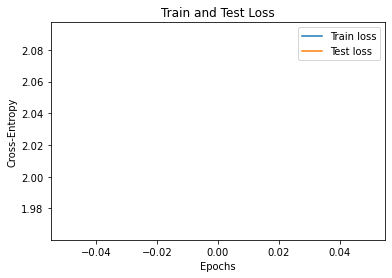

In [10]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()